# Random Forest Models

In [1]:
import os
import sys

from joblib import load
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

In [2]:
sys.path.insert(0, "../..")
import problem

## Load data

In [3]:
X_train, y_train = problem.get_train_data("../..")
X_test, y_test = problem.get_test_data("../..")

In [4]:
path_tuning = "./results_tuning"

## Random Forest

### Basic Random Forest

In [5]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(problem._additional_date_variables)
add_date_cols = ["season"]

categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols + add_date_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ],
)

regressor = RandomForestRegressor(
    max_features="sqrt", verbose=1, n_jobs=4, max_samples=0.5
)

pipe = make_pipeline(date_encoder, add_date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  6.6min finished


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _encode_dates at 0x7fd2f9461ee0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fd2f9461f70>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour',
                                                   'season']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', max_samples=0.5,
                                       n_jobs=4, verbose=1))])

In [6]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Train set, RMSE=0.28
Test set, RMSE=0.45


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


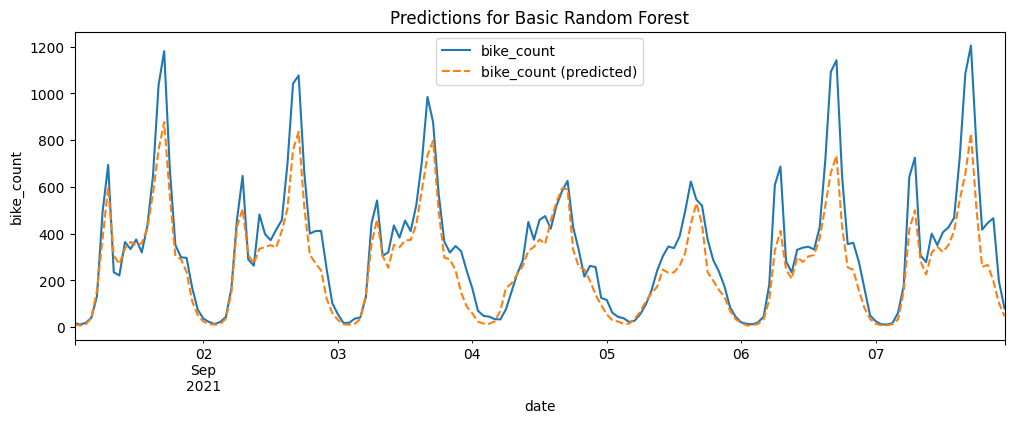

In [7]:
problem.week_plot(X_test, y_pred_test, y_test, "Basic Random Forest")

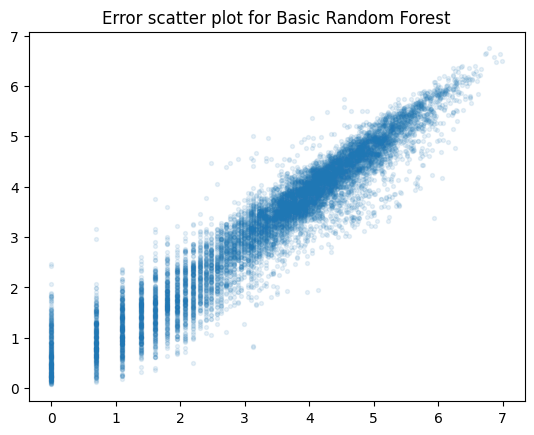

In [8]:
problem.error_plot(y_pred_test, y_test, "Basic Random Forest")

### Random Forest with additional date variables

In [9]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(problem._additional_date_variables)
add_date_cols = ["season"]

categorical_encoder = OneHotEncoder(handle_unknown="ignore")
categorical_cols = ["counter_name", "site_name"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols + add_date_cols),
        ("cat", categorical_encoder, categorical_cols),
    ],
)

regressor = RandomForestRegressor(
    max_features="sqrt", verbose=1, n_jobs=4, max_samples=0.5
)

pipe = make_pipeline(date_encoder, add_date_encoder, preprocessor, regressor)
pipe.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  3.7min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  8.4min finished


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _encode_dates at 0x7fd2f9461ee0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fd2f9461f70>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour',
                                                   'season']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name',
                                                   'site_name'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', max_samples=0.5,
                                       n_jobs=4, verbose=1))])

In [10]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.3s finished


In [11]:
print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

Train set, RMSE=0.28
Test set, RMSE=0.45


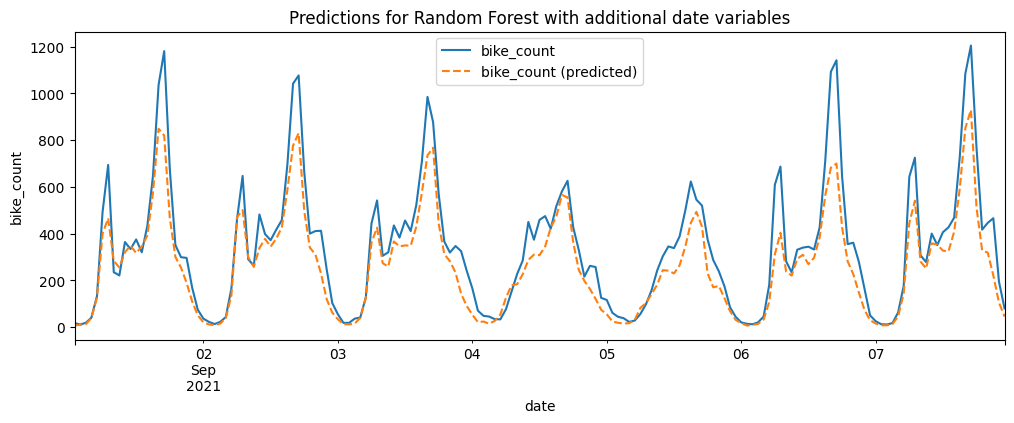

In [12]:
problem.week_plot(
    X_test, y_pred_test, y_test, "Random Forest with additional date variables"
)

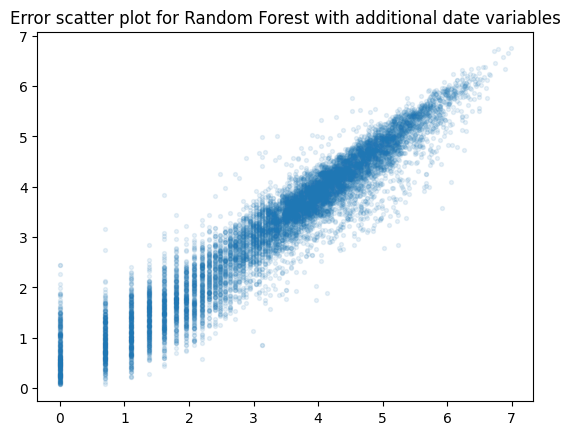

In [13]:
problem.error_plot(y_pred_test, y_test, "Random Forest with additional date variables")

### Random Forest with additional date variables and weather data

In [14]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)
add_date_cols = ["season"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]
categorical_cols = ["counter_name", "site_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols + add_date_cols),
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ],
)

regressor = RandomForestRegressor(
    max_features="sqrt", verbose=1, n_jobs=4, max_samples=0.5
)

pipe = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    preprocessor,
    regressor,
)
pipe.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  9.4min
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed: 17.2min finished


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fd2f9467040>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fd2f9461ee0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fd2f9461f70>,
                                     kw_args={'dr...
                 ColumnTransformer(transformers=[('date',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour',
                                                   'season']),
                                                 ('num', StandardScaler(),
                                                  ['temp', 'dwpt', 'rhum',
                                                   'prcp', 'wspd', 'pres']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name', 'site_name',
                                                   'wdir'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features='sqrt', max_samples=0.5,
                                       n_jobs=4, verbose=1))])

In [15]:
y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.6s finished


Train set, RMSE=0.29
Test set, RMSE=0.57


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.2s finished


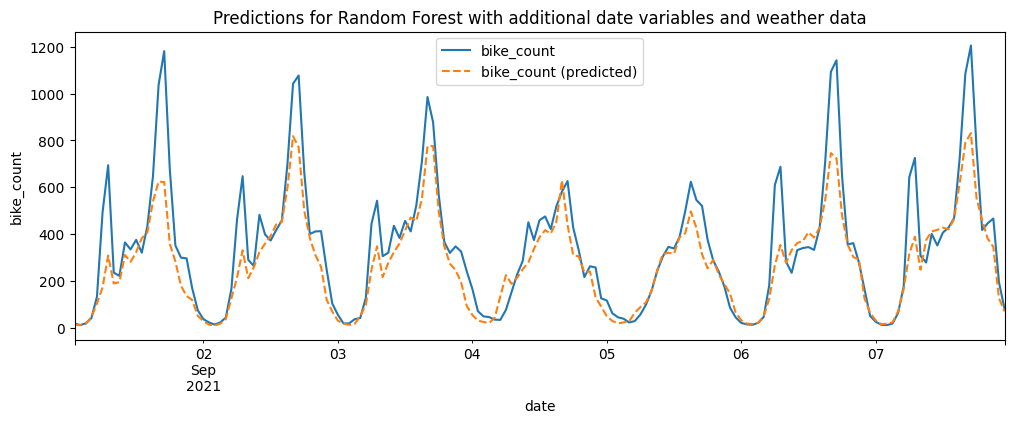

In [16]:
problem.week_plot(
    X_test,
    y_pred_test,
    y_test,
    "Random Forest with additional date variables and weather data",
)

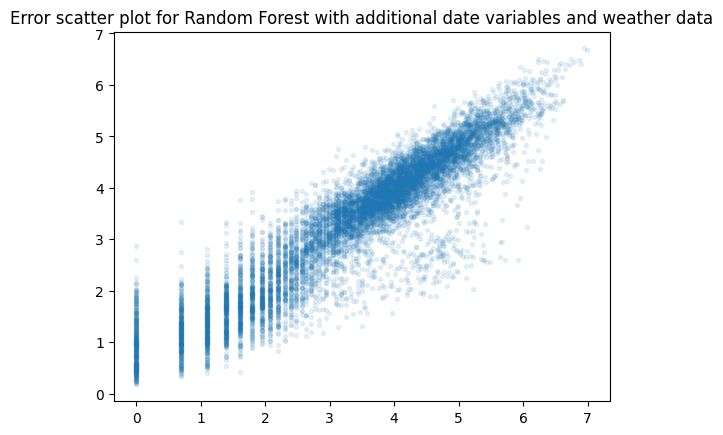

In [17]:
problem.error_plot(
    y_pred_test, y_test, "Random Forest with additional date variables and weather data"
)

In [18]:
# get the depths to have a feeling for tuning
depths = [i.get_depth() for i in pipe["randomforestregressor"].estimators_]
print(min(depths))
print(max(depths))

86
101


### Tuned Random Forest with additional date variables and weather data

First used grid: 

```
# define grid for parameter tuning
    grid = {
        "randomforestregressor__n_estimators": [200, 400],
        "randomforestregressor__max_samples": [0.4, 0.6, 0.8],
        "randomforestregressor__max_depth": [20, 40, 60, 80],
        "randomforestregressor__max_features": ["sqrt", 0.2],
    }
```

After checking the first results in the terminal (since we use the verbose parameter for GridSearchCV), we decided to adjust the grid to the following to limit runtime and finetune a bit more.

```
grid = {
        "randomforestregressor__n_estimators": [300],
        "randomforestregressor__max_samples": [0.4, 0.5, 0.6],
        "randomforestregressor__max_depth": [30, 40],
        "randomforestregressor__max_features": ["sqrt", 0.15, 0.25],
    }
```

In [19]:
cv_results = pd.read_csv(
    os.path.join(path_tuning, "20221118_2031_tuning_RF_cv_results.csv")
)

In [20]:
cv_results.sort_values(by="rank_test_score").params[0]

"{'randomforestregressor__max_depth': 30, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__max_samples': 0.4, 'randomforestregressor__n_estimators': 300}"

In [21]:
date_encoder = FunctionTransformer(problem._encode_dates, kw_args={"drop_date": False})
date_cols = problem._encode_dates(X_train[["date"]]).columns.tolist()

add_date_encoder = FunctionTransformer(
    problem._additional_date_variables, kw_args={"drop_date": True}
)
add_date_cols = ["season"]

num_cols = ["temp", "dwpt", "rhum", "prcp", "wspd", "pres"]
categorical_cols = ["counter_name", "site_name", "wdir"]

preprocessor = ColumnTransformer(
    [
        ("date", OneHotEncoder(handle_unknown="ignore"), date_cols + add_date_cols),
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ],
)

regressor = RandomForestRegressor(
    n_estimators=300,
    max_samples=0.4,
    max_features="sqrt",
    max_depth=30,
    verbose=1,
    n_jobs=4,
)

tuning_rf = make_pipeline(
    FunctionTransformer(problem._merge_external_data, validate=False),
    date_encoder,
    add_date_encoder,
    preprocessor,
    regressor,
)
tuning_rf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.2min
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  9.8min finished


Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function _merge_external_data at 0x7fd2f9467040>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function _encode_dates at 0x7fd2f9461ee0>,
                                     kw_args={'drop_date': False})),
                ('functiontransformer-3',
                 FunctionTransformer(func=<function _additional_date_variables at 0x7fd2f9461f70>,
                                     kw_args={'dr...
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['year', 'month', 'day',
                                                   'weekday', 'hour',
                                                   'season']),
                                                 ('num', StandardScaler(),
                                                  ['temp', 'dwpt', 'rhum',
                                                   'prcp', 'wspd', 'pres']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['counter_name', 'site_name',
                                                   'wdir'])])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       max_samples=0.4, n_estimators=300,
                                       n_jobs=4, verbose=1))])

In [22]:
y_pred_train = tuning_rf.predict(X_train)
y_pred_test = tuning_rf.predict(X_test)

print(f"Train set, RMSE={mean_squared_error(y_train, y_pred_train, squared=False):.2f}")
print(f"Test set, RMSE={mean_squared_error(y_test, y_pred_test, squared=False):.2f}")

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.2s


Train set, RMSE=0.59
Test set, RMSE=0.65


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.3s finished


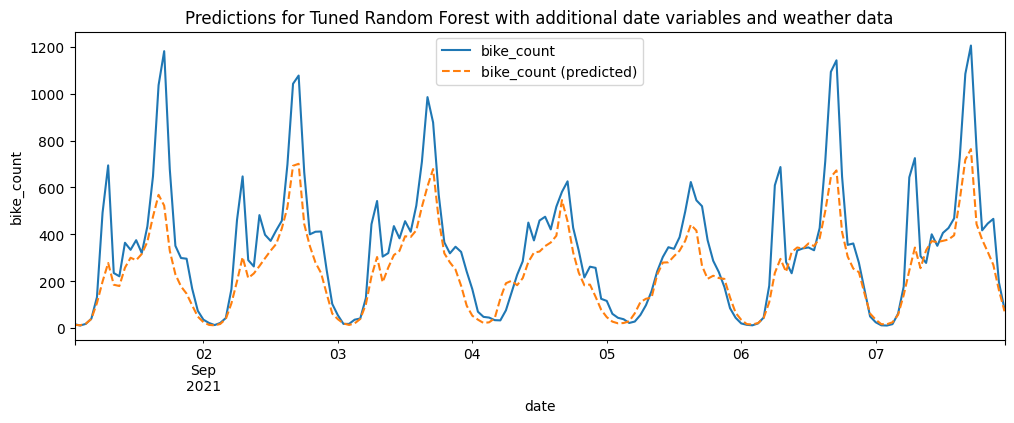

In [23]:
problem.week_plot(
    X_test,
    y_pred_test,
    y_test,
    "Tuned Random Forest with additional date variables and weather data",
)

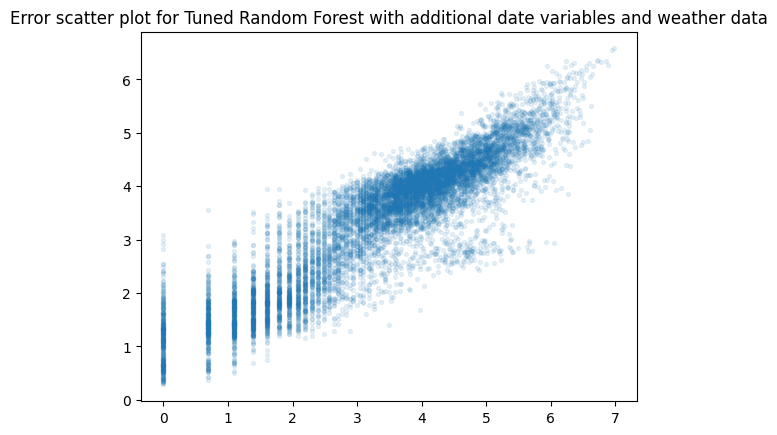

In [24]:
problem.error_plot(
    y_pred_test,
    y_test,
    "Tuned Random Forest with additional date variables and weather data",
)